In [2]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [3]:
# generate a dateset
num_inputs = 2
num_examples = 1000

true_w = torch.tensor([2, -3.4])
true_b = torch.tensor(4.2)

features = torch.randn(num_examples, num_inputs, dtype=torch.float32)

labels = torch.matmul(features, true_w) + true_b

labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

In [4]:
labels.shape

torch.Size([1000])

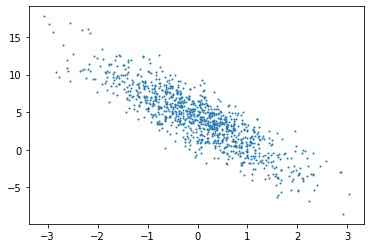

In [5]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [13]:
# read date
def data_iter(batch_size, feature, label):
    num_example = len(feature)
    indices = list(range(num_example))
    random.shuffle(indices)   # the reading order of the samples is random
    for i in range(0, num_example, batch_size):
        # The data read last time may be less than one batch
        j = torch.LongTensor(indices[i:min(i+batch_size, num_example)])
        yield feature.index_select(dim=0, index=j), label.index_select(dim=0, index=j)

In [14]:
# test read
batch = 10
for X, y in data_iter(batch, features, labels):
    print(X, y)
    break

tensor([[ 0.1717, -0.3258],
        [ 0.6070,  0.6723],
        [-1.9307, -0.6204],
        [ 1.3547,  1.1328],
        [ 0.5466, -1.0600],
        [ 0.4798, -0.0746],
        [ 1.0204, -0.7774],
        [-1.5599, -0.2066],
        [ 0.2056,  1.0813],
        [-1.3022, -0.1317]]) tensor([5.6604, 3.1333, 2.4413, 3.0516, 8.9062, 5.4134, 8.8773, 1.7720, 0.9384,
        2.0167])


In [10]:
# model define
def linear_model(X, w, b):
    return torch.mm(X, w) + b

In [11]:
# loss-func define
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [12]:
def sgd(params, learning_rate, batch_size):
    for param in params:
        param.data -= learning_rate * param.grad / batch_size

In [33]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [34]:
lr = 0.03
num_epochs = 30
net = linear_model
loss = squared_loss

for epoch in range(num_epochs):

    for X, y in data_iter(batch, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch)

        w.grad.data.zero_()
        b.grad.data.zero_()

    train_l = loss(net(features, w, b), labels)
    print("epoch {:d}, loss {:8f}".format(epoch+1, train_l.mean().item()))

epoch 1, loss 0.044182
epoch 2, loss 0.000172
epoch 3, loss 0.000052
epoch 4, loss 0.000052
epoch 5, loss 0.000052
epoch 6, loss 0.000052
epoch 7, loss 0.000052
epoch 8, loss 0.000052
epoch 9, loss 0.000052
epoch 10, loss 0.000052
epoch 11, loss 0.000052
epoch 12, loss 0.000052
epoch 13, loss 0.000052
epoch 14, loss 0.000052
epoch 15, loss 0.000052
epoch 16, loss 0.000052
epoch 17, loss 0.000052
epoch 18, loss 0.000052
epoch 19, loss 0.000052
epoch 20, loss 0.000052
epoch 21, loss 0.000052
epoch 22, loss 0.000052
epoch 23, loss 0.000052
epoch 24, loss 0.000052
epoch 25, loss 0.000052
epoch 26, loss 0.000052
epoch 27, loss 0.000052
epoch 28, loss 0.000052
epoch 29, loss 0.000052
epoch 30, loss 0.000052


In [29]:
print("ture: ", true_w, true_b)
print("pred: ", w, b)

ture:  tensor([ 2.0000, -3.4000]) tensor(4.2000)
pred:  tensor([[ 2.0000],
        [-3.4000]], requires_grad=True) tensor([4.2001], requires_grad=True)
